(probability-distributions)=
# Distribuições de probabilidade

Glossário:

- **Função de distribuição cumulativa (Cumulative distribution function - `CDF`**): é a funcão $F: \mathbb{R} \rightarrow \left[ 0,1 \right]$ definida por 

$$F(x) = \mathbb{P}(X \le x),$$

onde $\mathbb{P}$ representa a probabilidade. A função CDF precisa ser sempre crescente e normalizada.

- **Função de probabilidade (Probability mass function - `PMF`**): para uma variável discreta $X$, é dada por $p = \mathbb{P}(X = x)$ e atende as propriedades: $p \ge 0 \forall x \in \mathbb{R}$ e $\sum_{i}p(x_{i}) = 1$.

A relação entre $F$ e $p$ é dada por: 

$$F(x) = \mathbb{P}(X \le x) = \sum_{x_{i} \le x}p(x_{i})$$

- **Função densidade de probabilidade (Probability density function - `PDF`**): se $X$ é uma variável contínua, atende às propriedades: $p(x) \ge 0 \forall x \in \mathbb{R}$, $\int_{-\infty}^{+\infty}p(x_{i}) = 1$ e para todo intervalo $a \le b$

$$\mathbb{P}(a < X < b) = \int_{a}^{b}p(x)dx$$

## Regras da probabilidade

- **Regra da soma**: $p(X) = \sum_{Y}p(X,Y)$ ou $p(X) = \int{Y}p(X,Y)dy$ para variáveis contínuas.

- **Regra do produto**: $p(X,Y) = p(Y \vert X)p(X)$.

- **Teorema de Bayes**:

$$p(Y \vert X) = \frac{p(X \vert Y) p(Y)}{p(X)}$$

- **Marginalização**: 

$$p(X) = \sum_{Y}p(X \vert Y)p(Y)$$



## Exemplos de Distribuições

In [1]:
from scipy.stats import gamma, beta
from scipy.special import gamma as gamma_func
import numpy as np
import matplotlib.pyplot as plt

**Função Gamma** (não confundir com a distribuição de mesmo nome)

$$\Gamma(a) = \int_{0}^{\infty}e^{-x}x^{a-1}dx$$

Se $a$ é um positivo inteiro, então $\Gamma(a) = (a-1)!$.

### Distribuição Gamma

PDF: 

$$Gamma(x \vert k,\theta) = \frac{\theta^{-k}}{\Gamma(k)}x^{k-1}e^{-\frac{x}{\theta}}$$

Parâmetros:
- $k > 0$ shape - número de eventos que desejamos esperar
- $\theta > 0$ scale - $\frac{1}{\theta}$: taxa de eventos por unidade de tempo  

ou ainda

$$Gamma(x \vert a,b) = \frac{b^{a}}{\Gamma(a)}x^{a-1}e^{-xb}$$

Suporte: $x \in (0,\infty)$

Média: $\mathbb{E}\left[ x \right] = \frac{a}{b}$

Variância: $var \left[ x \right] = \frac{a}{b^{2}}$

Mode: $moda \left[ x \right] = \frac{a-1}{b} \forall a \ge 1$

Outras quantidades: $\mathbb{E}\left[ \ln{x} \right] = \psi(a) - \ln{b},$

onde $\psi(a)$ é da função digamma: $\psi(a) = \frac{d}{da}\ln{\Gamma(a)}$. Para saber mais sobre a função digamma veja [aqui](http://scipp.ucsc.edu/~haber/archives/physics116A10/psifun_10.pdf).

$$H\left[ x \right] = \ln{\Gamma(a)} - (a-1)\psi(a) - \ln{b} +a$$

In [1]:
0.7*0.8,0.4*0.5

(0.5599999999999999, 0.2)

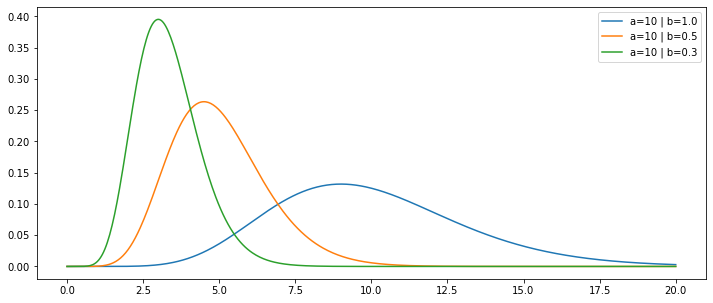

In [2]:
x = np.linspace(0,20,500)

plt.figure(figsize=(12,5))
for i in [1/1,1/2,1/3]:
    for j in [10]:
        plt.plot(x,gamma(a=j,scale=i).pdf(x),label=f'a={j} | b={i:.1f}')
plt.legend(loc=0)
plt.show()

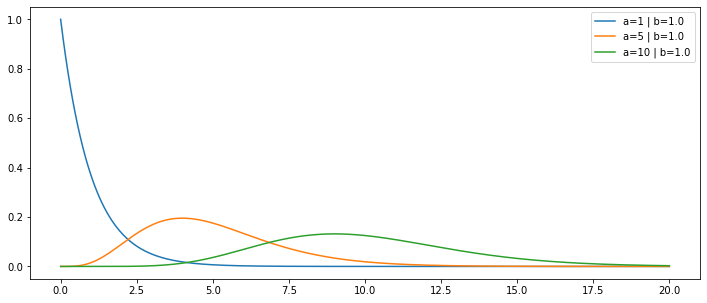

In [3]:
x = np.linspace(0,20,500)

plt.figure(figsize=(12,5))
for i in [1/1]:
    for j in [1,5,10]:
        plt.plot(x,gamma(a=j,scale=i).pdf(x),label=f'a={j} | b={i:.1f}')
plt.legend(loc=0)
plt.show()

**Exemplo de teoria de filas**: Você está em uma fila com duas pessoa na sua frente, uma sendo atendida e a outra na sua frente esperando. O tempo médio de espera entre dois serviços independente é de 2 minutos. Isso quer dizer que a taxa de servições por minuto é 0.5/minuto.

Qual é a probabilidade de você esperar mais do que 5 minutos na fila?

$\theta = 2$ ou $b = 0.5$ e $a = k = 2$ (precisamos esperar por dois eventos).

$\mathbb{P}(X \ge 5) = 1 - \mathbb{P}(X < 5) = 1 - \int_{0}^{5}Gamma(x \vert 2, 0.5)dx$

In [4]:
p = 1-gamma(a=2,scale=1/0.5).cdf(5)
print(f"Probabilidade de esperar mais do que 5 minutos é {p:.1%}")

Probabilidade de esperar mais do que 5 minutos é 28.7%


### Distribuição Beta

É uma distribuição sobre uma variável contínua entre $[0,1]$. É normalmente usada para representar a probabilidade de algum evento binário.

PDF:

$$Beta(x \vert a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1}$$

Parâmetros:
- $a - 1 $: número de sucessos
- $b - 1 $: número de falhas

$x$ é a probabilidade de sucesso em um experimento de Bernoulli.

Média: $\mathbb{E}\left[ x \right] = \frac{a}{a+b}$

Variância: $var \left[ x \right] = \frac{ab}{(a+b)^{2}(a+b+1)}$

Mode: $moda \left[ x \right] = \frac{a-1}{a+b-2}$

In [5]:
num_suc = 1
num_fail= 7
a = num_suc+1
b = num_fail+1
p = 0.5
(gamma_func(a+b)/(gamma_func(a)*gamma_func(b)))*(p**(a-1))*((1-p)**(b-1))

0.28125

In [6]:
beta(a,b).pdf(0.5)

0.28125000000000006

Qual é a probabilidade de obter mais de 50% de sucesso?

In [7]:
p = 1-beta(a,b).cdf(0.5)
print(f"Probabilidade de obter mais de 50% de sucesso é {p:.2%}")

Probabilidade de obter mais de 50% de sucesso é 1.95%


Qual é a probabilidade de obter menos de 50% de sucesso?

In [8]:
p = beta(a,b).cdf(0.5)
print(f"Probabilidade de obter menos de 50% de sucesso é {p:.2%}")

Probabilidade de obter menos de 50% de sucesso é 98.05%


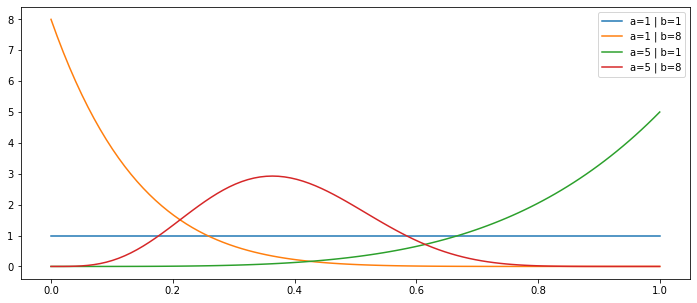

In [9]:
x = np.linspace(0,1,100)

plt.figure(figsize=(12,5))
for i in [1,5]:
    for j in [1,8]:
        plt.plot(x,beta(a=i,b=j).pdf(x),label=f'a={i} | b={j}')
plt.legend(loc=0)
plt.show()

### Distribuição de Poisson <a class="anchor" id="1-1"></a>

Esta é uma distribuição discreta que expressa a probabilidade de um determinado número de eventos ocorrer em um intervalo fixo (o mais comum é usar para eventos que ocorrem com o tempo), desde que a taxa média de ocorrência seja constante e os eventos sejam independentes do tempo.

Seja $\lambda$ o número médio eventos por unidade de tempo, podemos escrever a probabilidade de ocorrerem $k$ eventos em um intervalo $t$ como:

$$P(X=k;t) = \frac{(\lambda t)^{k} e^{-\lambda t}}{k!}$$

O valor real positivo $\lambda t$ é igual ao valor esperado de $X$ e também igual a variância de $X$: $\lambda t = \mathbb{E}(X) = Var(X)$.

In [10]:
import numpy as np
from scipy.stats import poisson

Definimos a distribuição para algum λ:

In [11]:
λ = 5   # nesse caso t=1
poi = poisson(mu=λ)

Podemos fazer uma amostragem dessa distribuição:

In [12]:
x = poi.rvs(size=30)
x

array([ 4, 11,  5,  4,  5,  5,  5,  6,  4,  5,  3,  2,  9, 11,  3,  5,  5,
        3,  6,  5,  5, 10,  5,  4,  6,  3,  4,  4,  8,  6])

In [13]:
x.mean(),x.std()**2

(5.366666666666666, 5.098888888888887)

Probabilidade de ocorrer k eventos por unidade de tempo:

In [14]:
k = 3
print(f"Probabilidade de {k} eventos por unidade de tempo é: {poi.pmf(k=k):.2%}")

Probabilidade de 3 eventos por unidade de tempo é: 14.04%


### Distribuição Multinomial <a class="anchor" id="1-2"></a>

Seja um vetor $\textbf{x}$ de $K$ dimensões, sendo que cada elemento $x_{k}$ é uma variável aleatória binária e o vetor obedece o esquema $1\ de\ K$: um de seus elementos é $x_{k}=1$ e os demais iguais a $0$. Exemplo:

$\textbf{x} = \langle 0,0,1,0,0 \rangle$

Apenas o elemento $x_{3}=1$. Note que esse vetor é unitário, $\sum_{k=1}^{K}x_{k}=1$.

Representamos a probabilidade de $x_{k}=1$ usando o parâmetro $\mu_{k}$ e podemos usar o vetor $\mu=\left( \mu_{1},\mu_{2},...,\mu_{K} \right)$. Assim a distribuição de $\textbf{x}$ é

$$p(\textbf{x} \vert \mu) = \prod_{k=1}^{K} \mu_{k}^{x_{k}}$$

Com valor esperado

$$\mathbb{E}\left[\textbf{x} \vert \mu \right] = \sum_{\textbf{x}} \textbf{x}p(\textbf{x} \vert \mu) = \mu$$

Note ainda que $\sum_{k=1}^{K}\mu_{k}=1$ e $\mu_{k} \in [0,1]$, pois eles representam probabilidades.

In [15]:
import numpy as np
from scipy.stats import multinomial

```python
Methods
-------
  pmf(x, n, p)
    Probability mass function.
  logpmf(x, n, p)
    Log of the probability mass function.
  rvs(n, p, size=1, random_state=None)
    Draw random samples from a multinomial distribution.
  entropy(n, p)
    Compute the entropy of the multinomial distribution.
  cov(n, p)
    Compute the covariance matrix of the multinomial distribution.
```

In [16]:
μ = [0.5,0.3,0.1,0.1]
mult = multinomial(n=1,p=μ)

In [17]:
mult.mean()

array([0.5, 0.3, 0.1, 0.1])

In [18]:
X = mult.rvs(size=10)

In [19]:
X

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

Considere um dataset $\mathcal{D}$ com $N$ observações independentes $\textbf{x}_{1},...,\textbf{x}_{N}$. A função de likelihood é

$$p\left( \mathcal{D} \vert \mu \right) = \prod_{k=1}^{K} \mu_{k}^{m_{k}}$$

onde $m_{k} = \sum_{n} x_{nk}$ representa o número de observações em que $x_{k}=1$.

Dessa maneira, o valor de $\mu$ que maximiza a likelihood é

$$\mu_{k}^{ML} = \frac{m_{k}}{N}$$

que é simplesmente a fração das $N$ observações em que $x_{k}=1$. As variáveis $m_{k}$ estão sujeitas à $\sum_{k=1}^{K}m_{k}=N$.

A distribuição multinomial é a distribuição conjunta das quantidades $m_{1},...,m_{K}$ condicionadas ao parâmetro $\mu$ e ao número total de observações $N$:

$$Mult \left( m_{1},m_{2},...,m_{K} \vert \mu,N \right) = \frac{N!}{m_{1}!m_{2}!...m_{K}!}\prod_{k=1}^{K} \mu_{k}^{m_{k}}$$



Exemplo: dado um vetor $\mu = (0.5,0.2,0.3)$, qual é a probabilidade de em 10 observações obtermos $m_{1}=5,m_{2}=4,m_{3}=1$?

In [20]:
def normalization_f_multi(m):
    N = sum(m)
    x = np.array([np.math.factorial(m[i]) for i in range(len(m))])
    prod = 1
    for i in range(len(m)):
        prod *= x[i]
    return np.math.factorial(N)/prod

def mult_prod(mu,m):
    prod = 1.
    for i in range(len(mu)):
        prod *= mu[i]**m[i]
    return prod

def mult_joint_prob(mu,m):
    return normalization_f_multi(m) * mult_prod(mu,m)

In [21]:
mu = [0.5,0.2,0.3]
m = [5,2,3]
mult = multinomial(n=10,p=mu)

In [22]:
normalization_f_multi(m),mult_prod(mu,m)

(2520.0, 3.375e-05)

In [23]:
print("Nossa função:",mult_joint_prob(mu,m))
print("Scipy       :",mult.pmf(m))

Nossa função: 0.08505
Scipy       : 0.08504999999999999


### Distribuição de Dirichlet <a class="anchor" id="1-3"></a>

A distribuição de Dirichlet pode ser usada para estimar a probabilidade de observarmos o vetor $\mu$ condicionado a outro parâmetro, o vetor $\alpha_{k}$, chamado de parâmetro de concentração. A definição geral da distribuição de Dirichlet é

$$Dir\left( \mu \vert \alpha \right) = \frac{\Gamma(\alpha_{0})}{\Gamma(\alpha_{1})...\Gamma(\alpha_{K})} \prod_{k=1}^{K}\mu_{k}^{\alpha_{k}-1}$$

onde $\alpha_{0} = \sum_{k=1}^{K}\alpha_{k}$ ($n$ nosso caso coincide com o número total de observações) e $\Gamma(x)$ é a função gama dada por:

$$\Gamma(x) = \int_{0}^{\infty}u^{x-1}e^{-u}du$$

que tem as propriedades: $\Gamma(x+1)=x\Gamma(x)$; $\Gamma(1)=1$; e se $x$ é um número inteiro positivo $\Gamma(x+1)=x!$.

In [24]:
from scipy.stats import dirichlet

In [25]:
alpha = [1.0,1.0,1.0]
diric = dirichlet(alpha)

In [26]:
diric.mean()

array([0.33333333, 0.33333333, 0.33333333])

In [27]:
x = diric.rvs(size=1000)
x

array([[0.21512095, 0.11100696, 0.67387209],
       [0.77522263, 0.16350581, 0.06127156],
       [0.20251839, 0.70431946, 0.09316215],
       ...,
       [0.02911277, 0.38263377, 0.58825345],
       [0.2982091 , 0.16586772, 0.53592318],
       [0.12628688, 0.59331213, 0.28040099]])

In [28]:
x.mean(axis=0)

array([0.33035415, 0.34252115, 0.3271247 ])

In [29]:
diric.pdf(x.mean(axis=0))

2.0